In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from numba import njit

%run voter_model_with_mutation.ipynb

# Voter model with mutation
### For different alpha values; alpha = [10e-4, 10e-5, 10e-6, 10e-7, 10e-8, 10e-9, 10e-10, 10e-11, 10e-12]

In [17]:
# Set initials
all_grids = []
all_grids_0 = []
all_num_species = []

L = 200
n_iters = int(2e8)

# Run voter model on grid 200x200 for alpha = [10e-4, 10e-5, 10e-6, 10e-7, 10e-8, 10e-9, 10e-10, 10e-11, 10e-12]
powers = [-4, -5, -6, -7, -8]

for p in powers:
    grid_0 = init_grid(L)
    grid, num_species = voter_model(grid_0, 10*(10**p), n_iters)

    all_grids_0.append(grid_0)
    all_grids.append(grid)
    all_num_species.append(num_species)



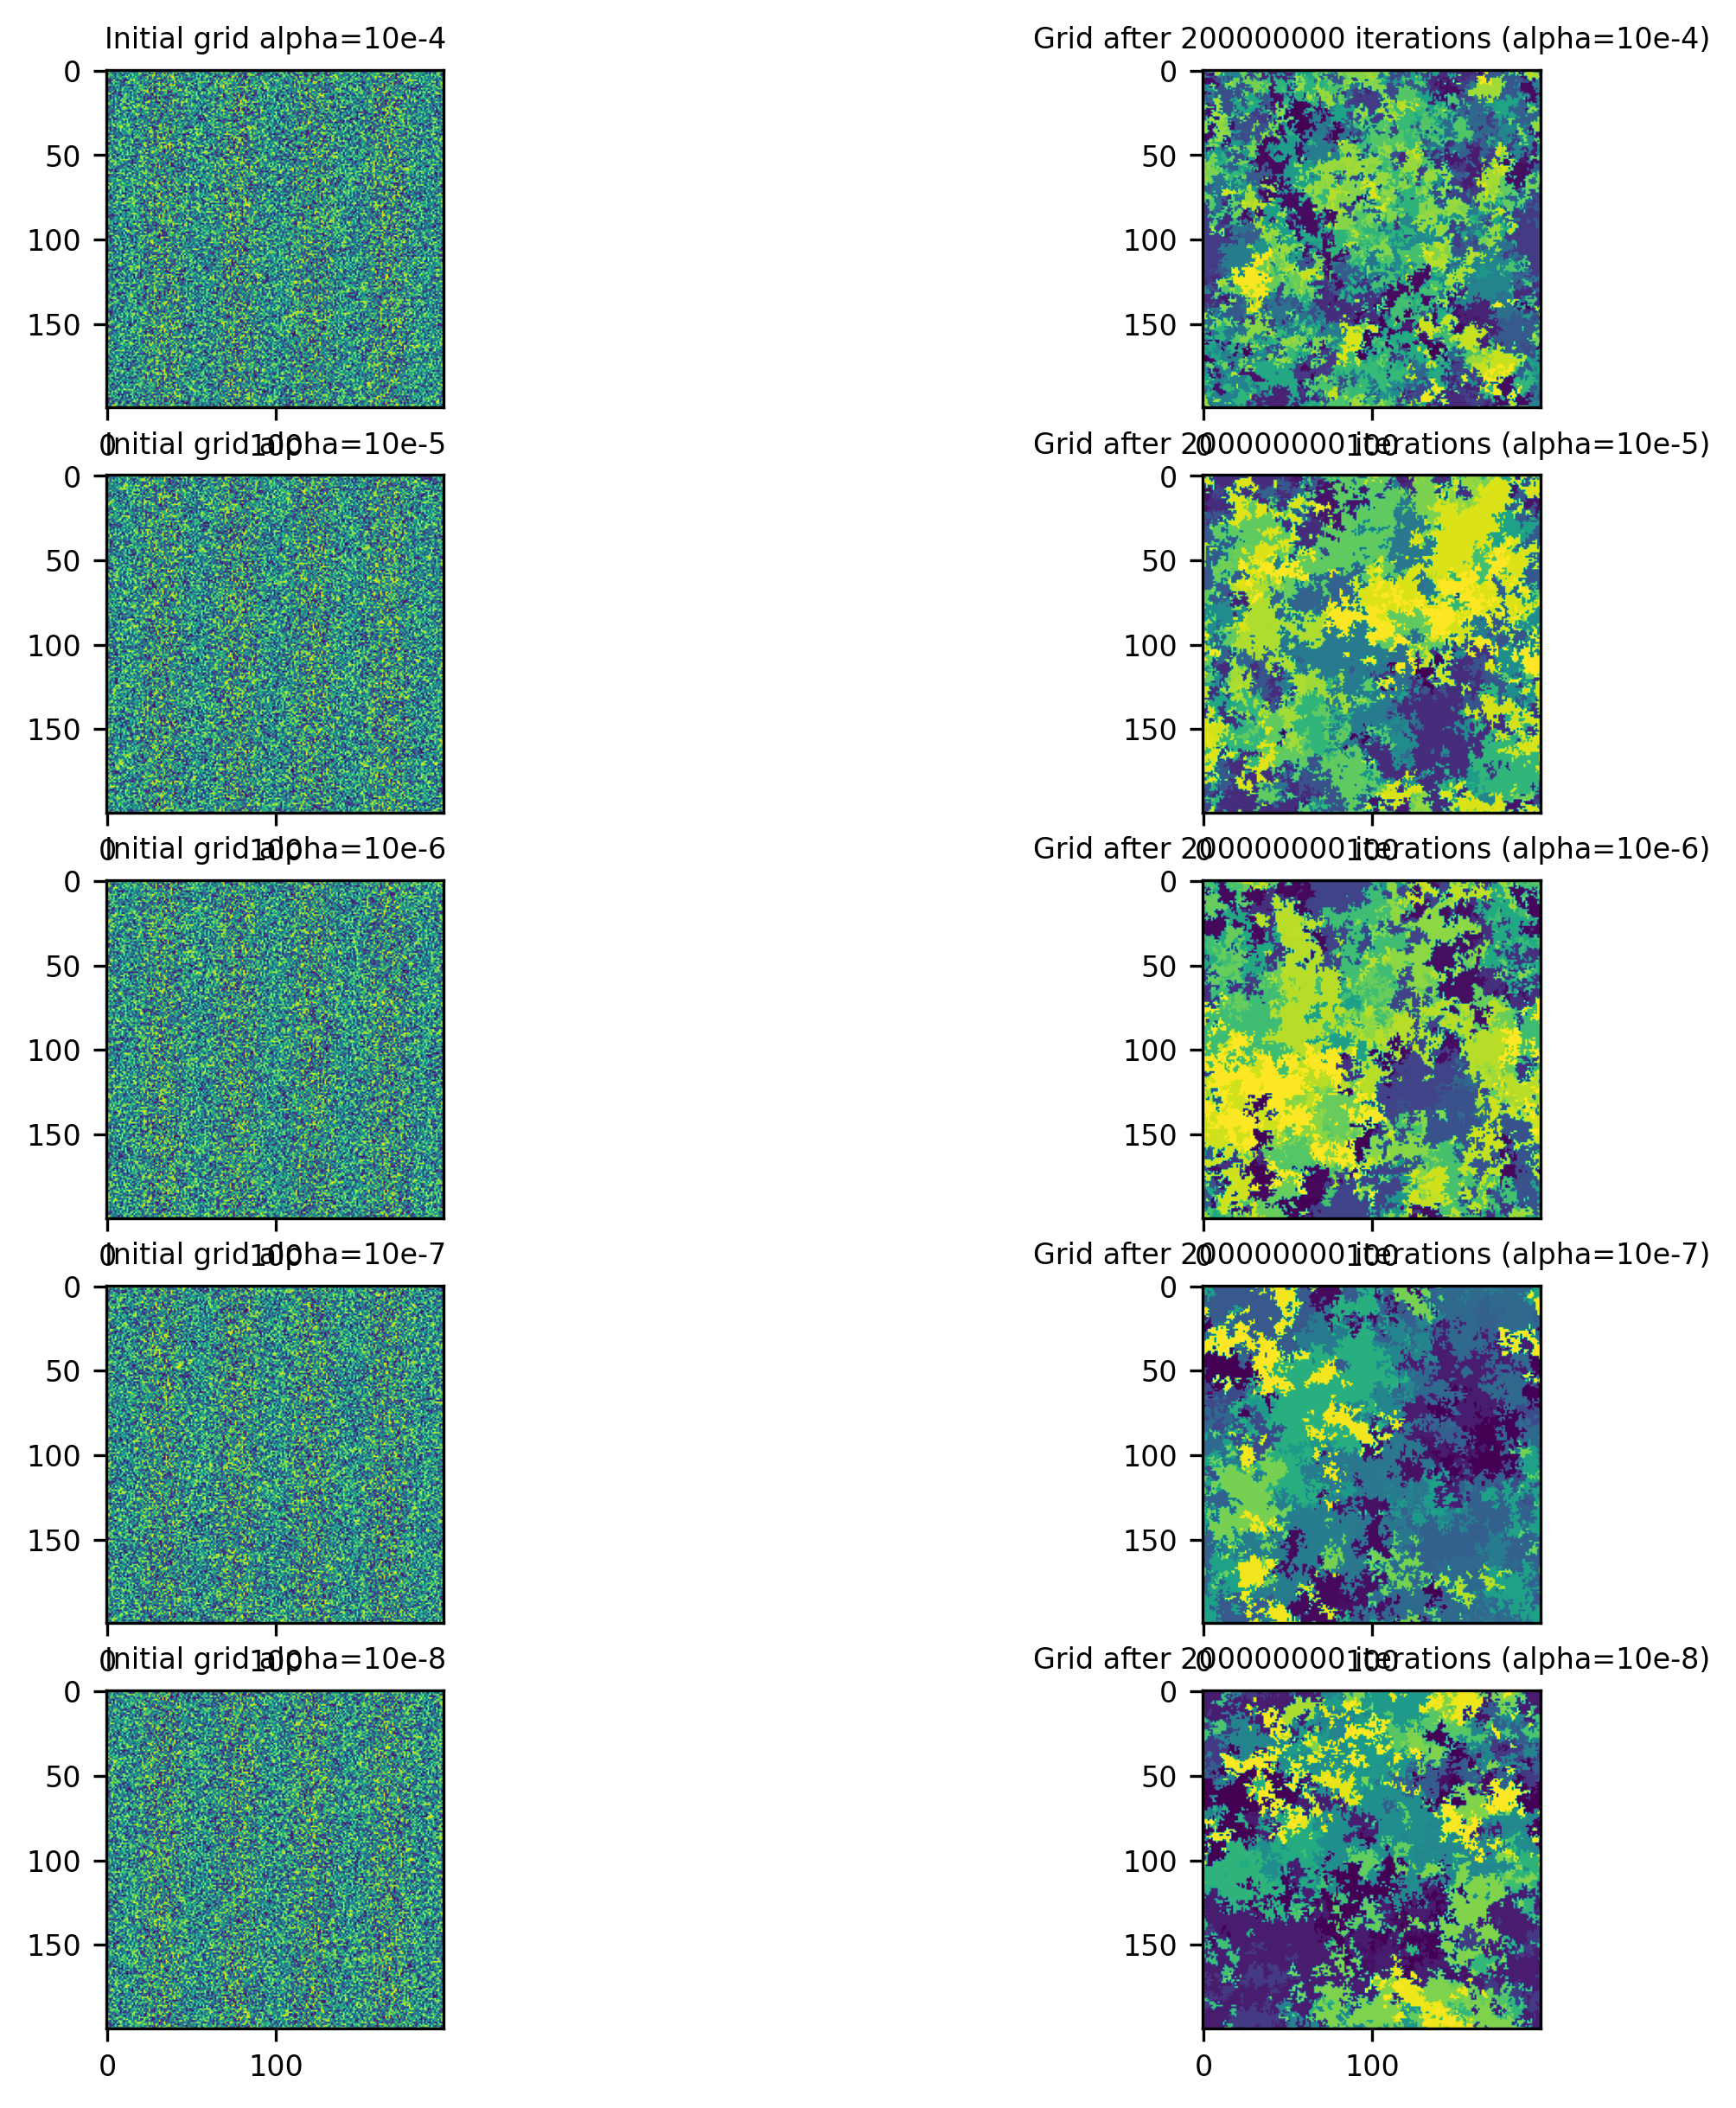

In [18]:
# Plot ecosystem visualization as 2D grid; before vs. after n iterations

mpl.rc('font', size=8)

fig, axs = plt.subplots(len(powers), 2, figsize = (10,10))

for r,p in enumerate(powers):
    for c in range(2):
        if c % 2 == 0:
            axs[r, c].imshow(all_grids_0[r])
            axs[r, c].set_title(f'Initial grid alpha=10e{p}', fontsize = 8)
        else:
            axs[r, c].imshow(all_grids[r])
            axs[r, c].set_title(f'Grid after {n_iters} iterations (alpha=10e{p})', fontsize = 8)
        axs[r, c].tick_params(axis='x', labelsize=8)
        axs[r, c].tick_params(axis='y', labelsize=8)
        

plt.show()

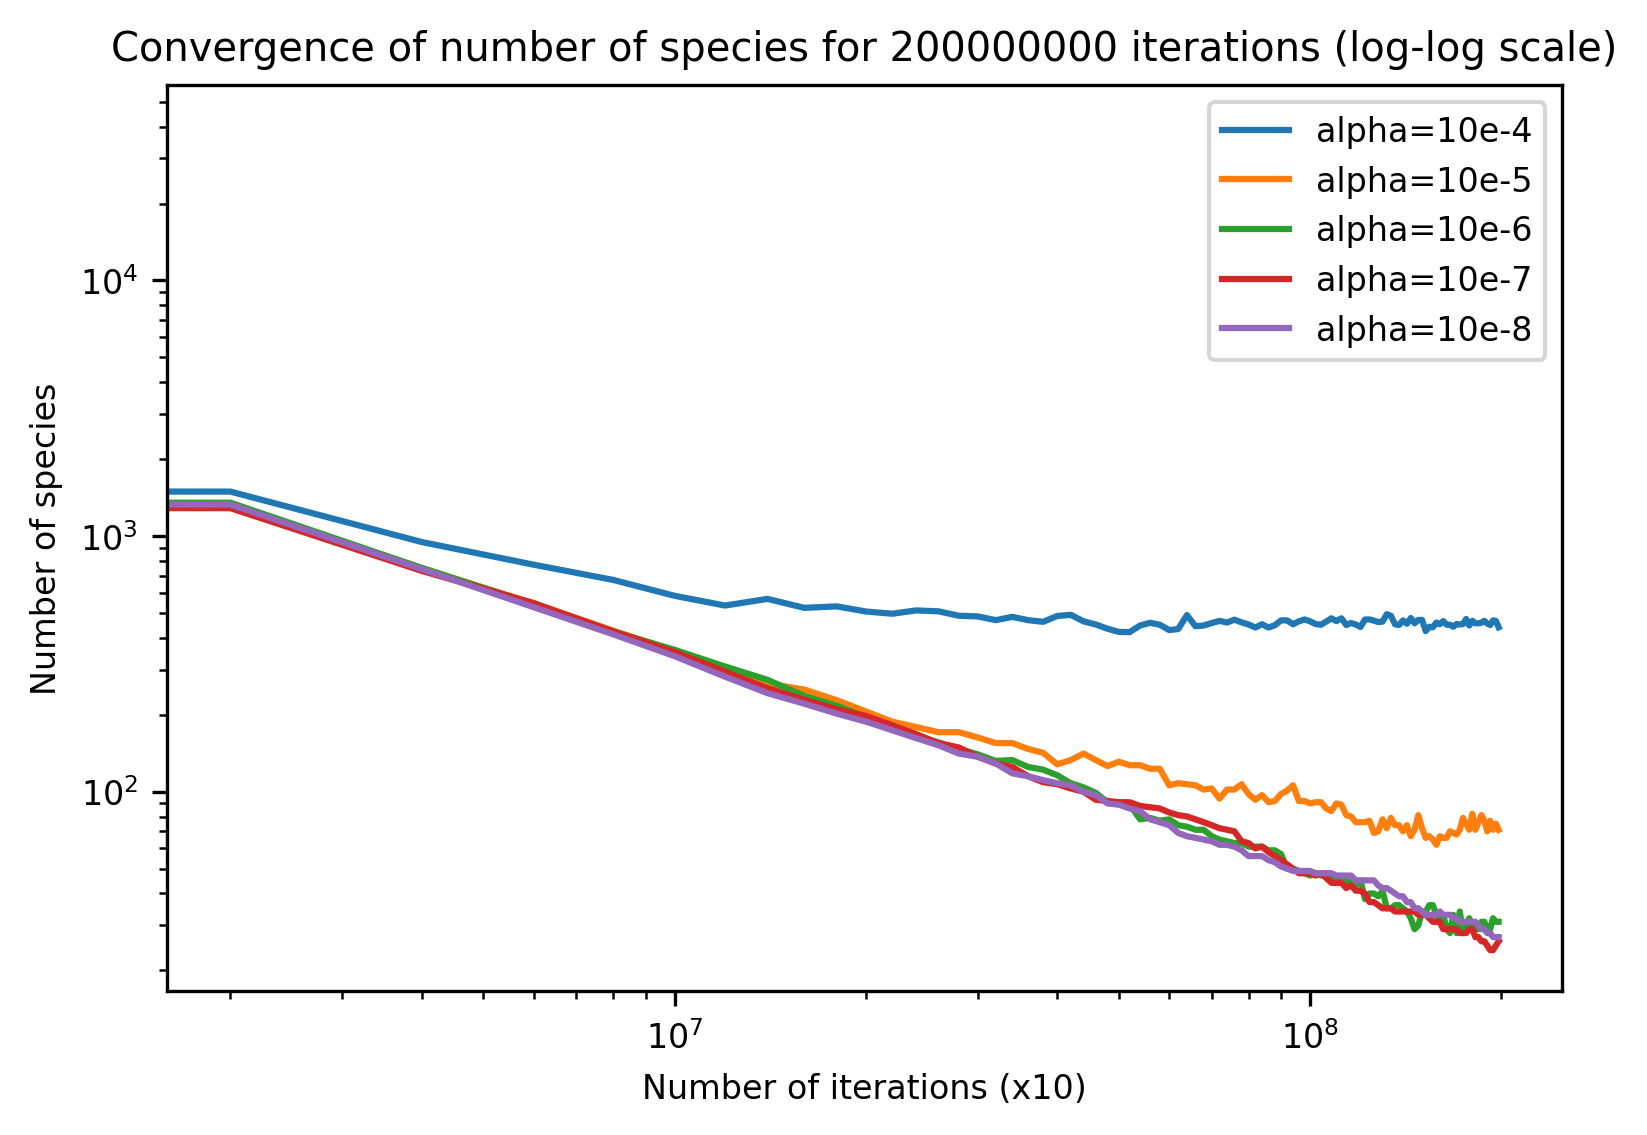

In [19]:
# Plot convergence of number species on log-log scale

for i,p in enumerate(powers):
    plt.loglog(np.arange(0, n_iters, n_iters/100), all_num_species[i], label=f'alpha=10e{p}')

plt.legend()
plt.ylabel('Number of species')
plt.xlabel('Number of iterations (x10)')
plt.title(f'Convergence of number of species for {n_iters} iterations (log-log scale)')
plt.show()

[ 0.73832586 -0.7292792 ]
[ 0.4962899  -0.29690528]
[ 0.39813423 -0.15551953]
[0.35533122 0.05402101]
[ 0.37614896 -0.01404615]


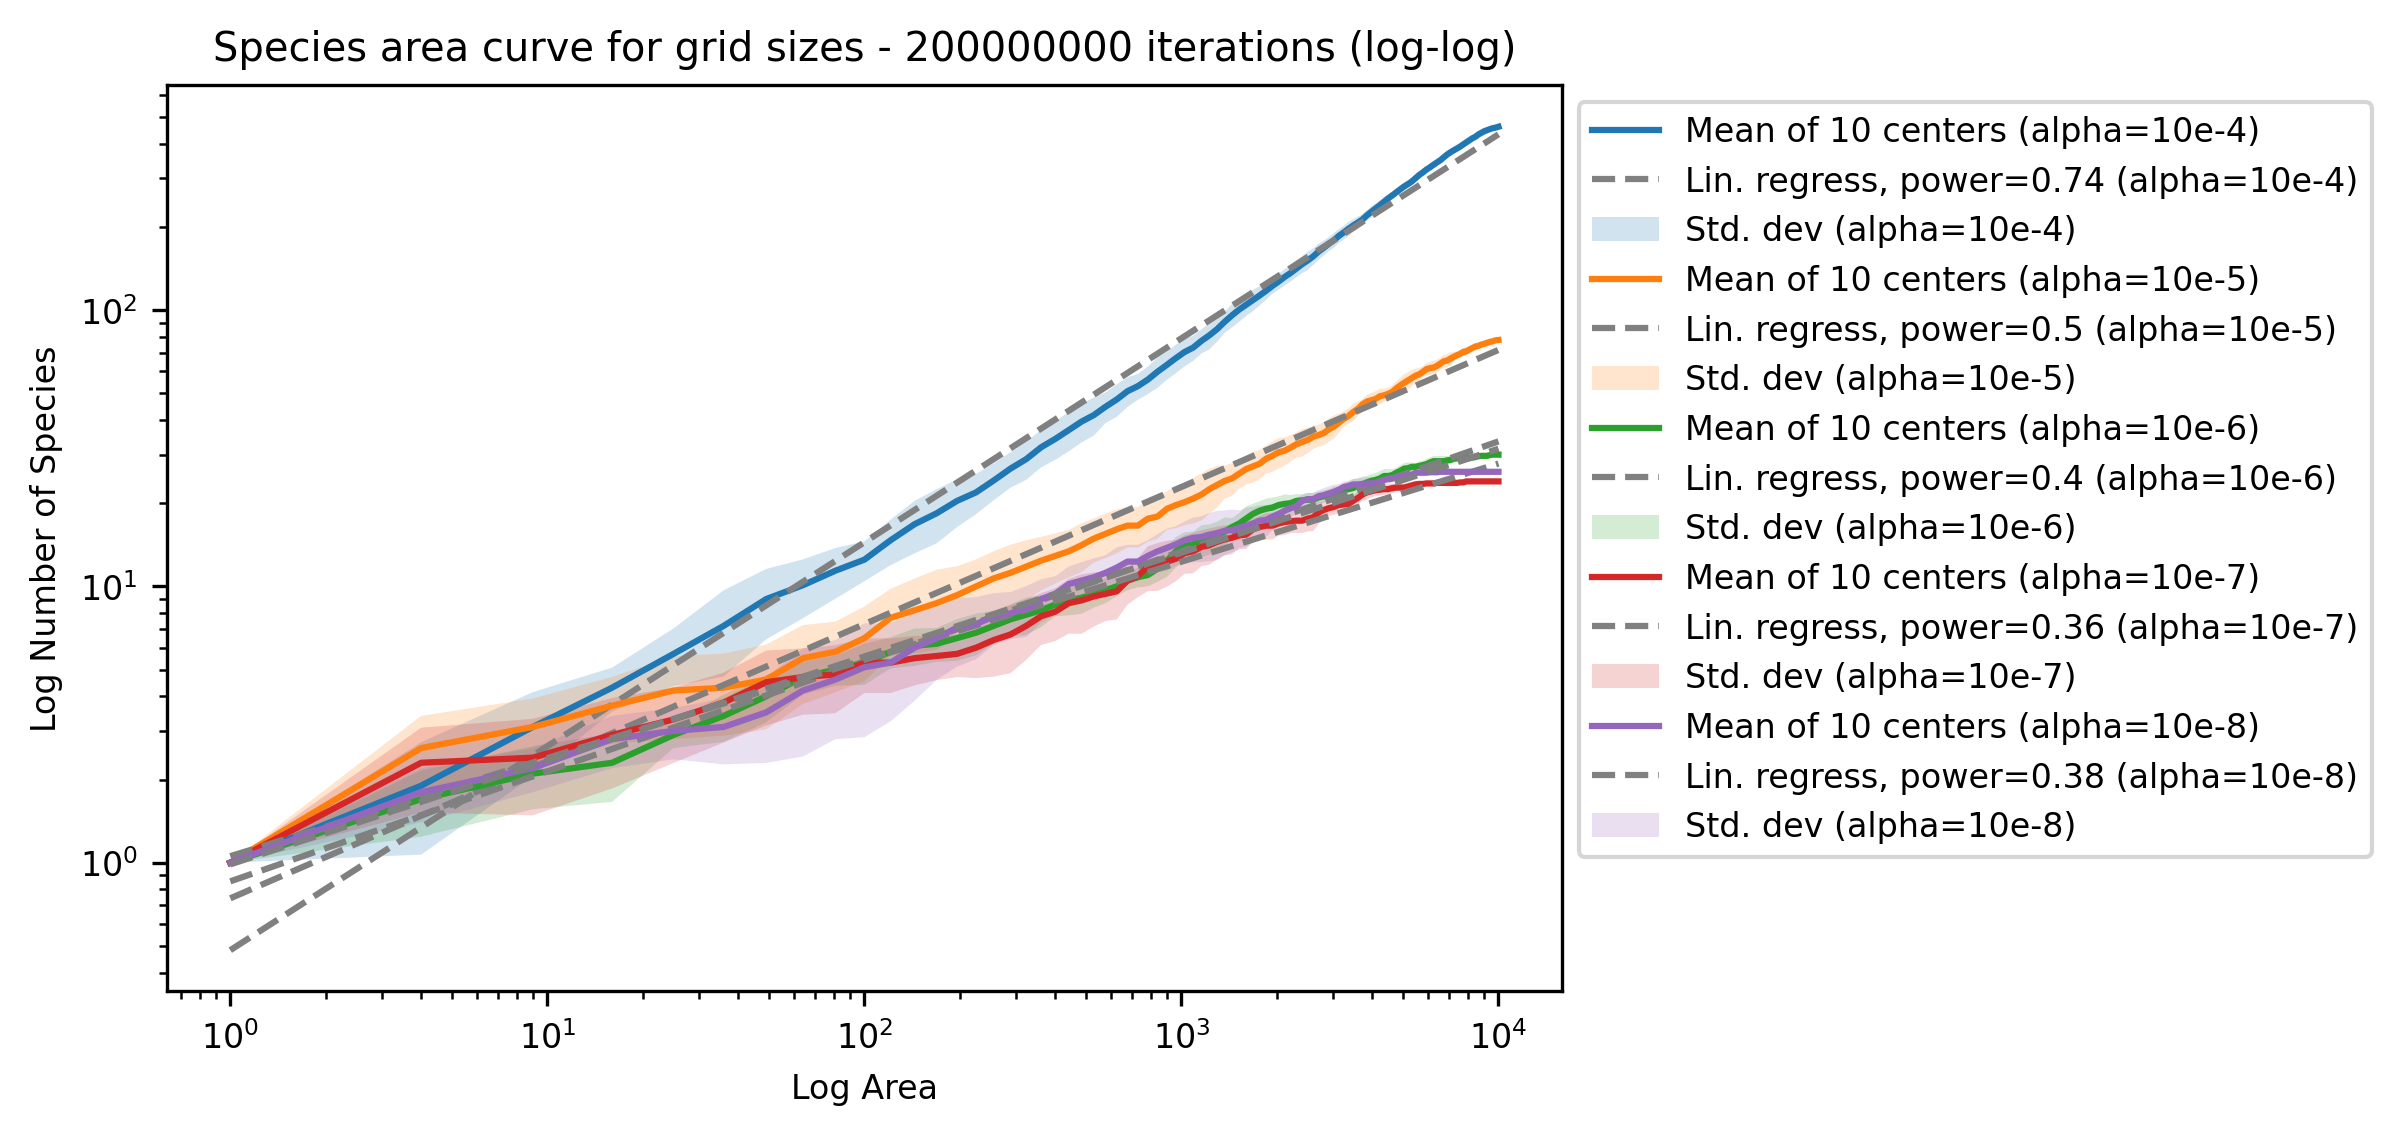

In [20]:
# Plot species-area curves for all grid sizes on log-log scale

for i in range(len(all_grids)):

    # Takes mean curve from computation 10 random centers
    areas, species = sa_curve(all_grids[i])

    # Compute mean and standard deviation of curves
    spec_std_dev = np.std(species, axis=0)
    spec_mean = np.mean(species, axis=0)

    # Fit linear regression
    poly_coeffs = np.polyfit(np.log(areas), np.log(spec_mean), 1)
    print(poly_coeffs)

    plt.loglog(areas, spec_mean, label=f'Mean of 10 centers (alpha=10e{powers[i]})')
    plt.loglog([areas[0], areas[-1]], 
            np.exp(poly_coeffs[1]) * np.array([areas[0], areas[-1]])**poly_coeffs[0], 
            color='grey', 
            linestyle='dashed',
            label=f'Lin. regress, power={round(poly_coeffs[0], 2)} (alpha=10e{powers[i]})')
    plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label=f'Std. dev (alpha=10e{powers[i]})')

plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for grid sizes - {n_iters} iterations (log-log)')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()